In [1]:
%matplotlib inline
import sys
import helper_functions as hf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scanpy as sc
import scipy.sparse as ssp

hf.set_plot_defaults(fontsize=12)
sc.settings.set_figure_params(dpi=150)  # low dpi (dots per inch) yields small inline figures

### Load Data

In [2]:
adata = sc.read('210902_PATBROWN_final_filtered_updated.h5ad')

### Subcluster and PCA Project

In [3]:
# Subcluster data to consider cells at BBB
adata = adata[adata.obs['leiden'].isin(['13'])]

In [4]:
adata

View of AnnData object with n_obs × n_vars = 662 × 31402
    obs: 'barcode', 'barcode_seq', 'Hash1', 'Hash1_reads', 'Hash2', 'Hash2_reads', 'Hash3', 'Hash3_reads', 'Hash4', 'Hash4_reads', 'n_counts_txome', 'n_counts', 'mito_frac', 'Hash1_ind', 'Hash2_ind', 'Hash3_ind', 'Hash4_ind', 'sample', 'timepoint', 'genotype', 'tissue', 'library', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'leiden', 'annotations'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'highly_variable_prefilt'
    uns: 'annotations_colors', 'genotype_colors', 'leiden', 'leiden_colors', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    obsp: 'connectivities', 'distances'

In [5]:
# Claculate QC Metrics
sc.pp.calculate_qc_metrics(adata, inplace=True)

# Total Counts Normalization
sc.pp.normalize_per_cell(adata, counts_per_cell_after=adata.obs['n_counts'].mean())
# sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)


# Save raw data
adata.raw = adata


Trying to set attribute `.obs` of view, copying.


In [6]:
# Wolbatch mask
mask = adata.obs['genotype'].str.contains('AB|RNF')
mask = mask.values

    filtering genes...


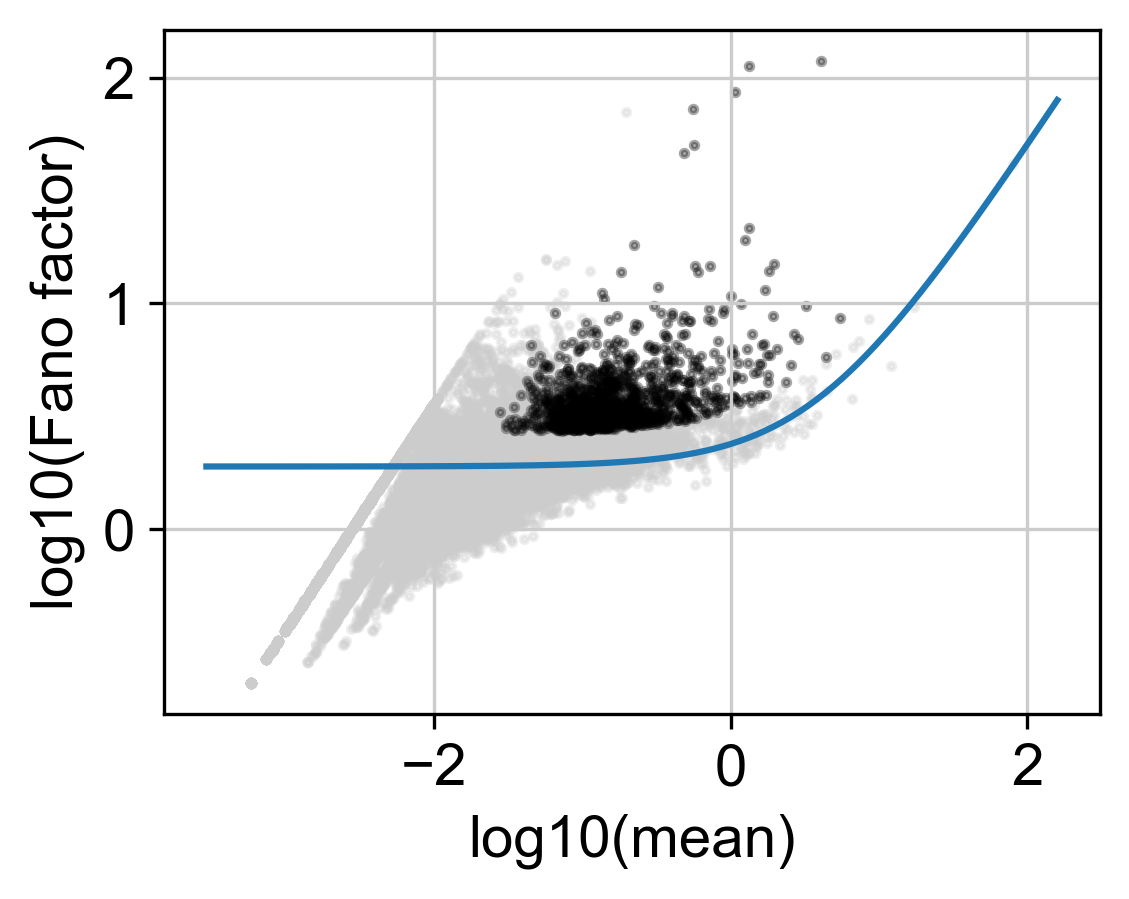

        1058 highly variable genes
    running PCA...
    finding neighbors...
    running UMAP...
    running Leiden clustering...


In [7]:
hf.process_ad(adata,
    normalize=False,
    plot_vscore=True,
    n_components=50,
    n_neighbors=10,
    verbose=True, 
    batch_base_mask=mask,
    leiden_res=2
    )

### Plot UMAP

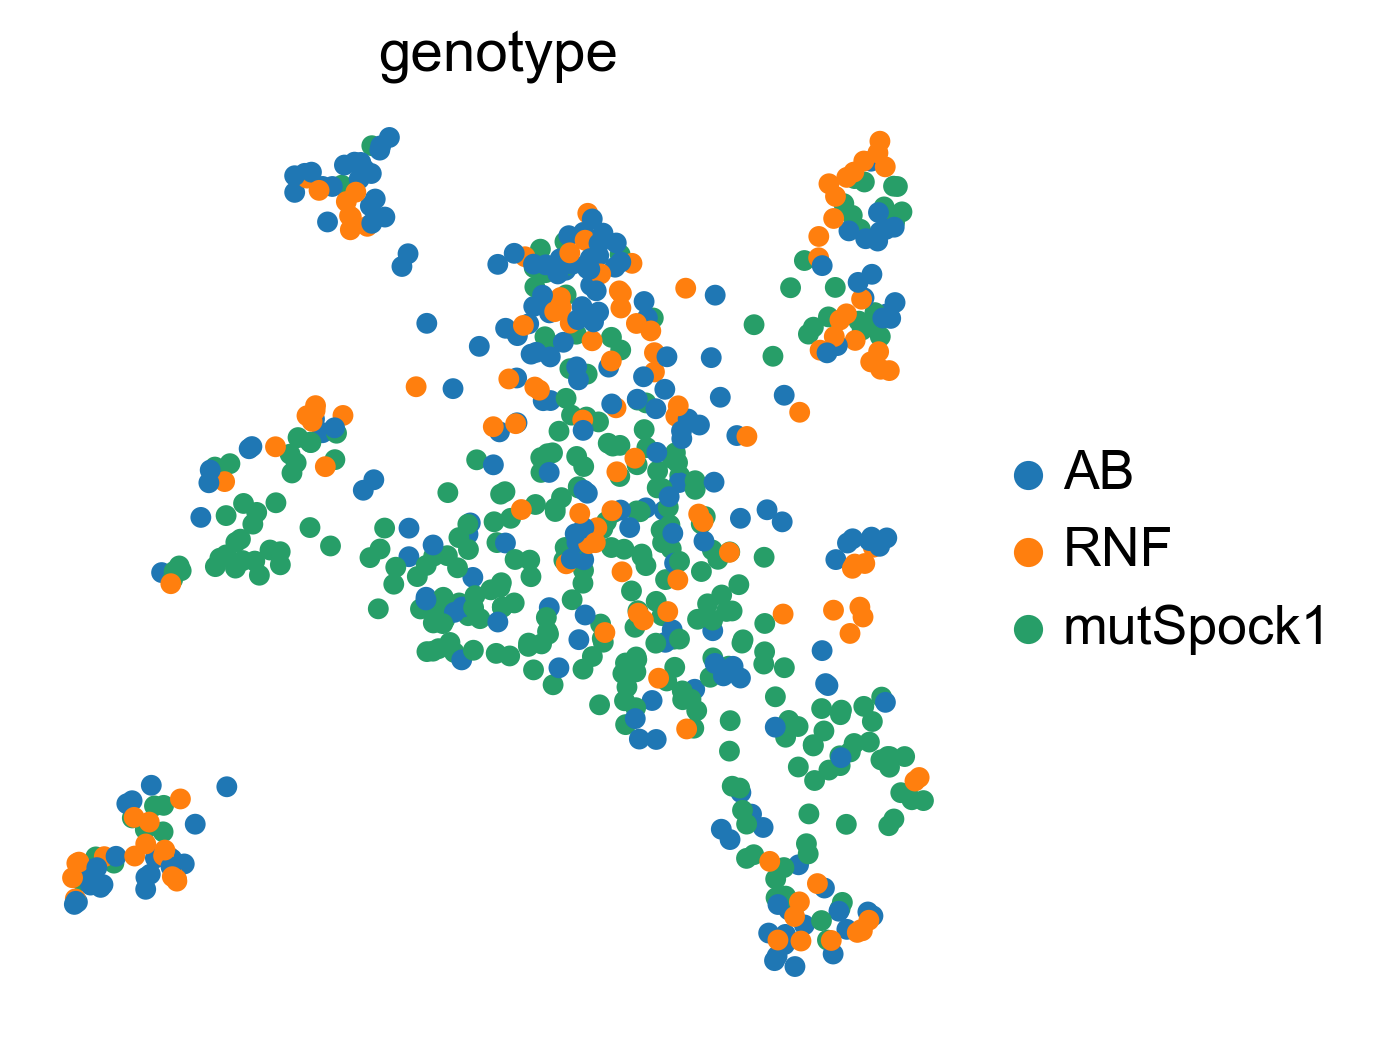

In [8]:
# Plot genotypes
sc.pl.umap(adata, color='genotype', size=100, frameon=False, save='_Endothelial_Subclustered_genotype.pdf')

In [9]:
# Replot but combine AB and RNF lines
adata.obs['genotype_comb'] = 'none'
adata.obs['genotype_comb'][adata.obs['genotype'].isin(['AB','RNF'])] = 'WT'
adata.obs['genotype_comb'][adata.obs['genotype'].isin(['mutSpock1'])] = 'mutSpock1'

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


/Applications/anaconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'genotype_comb' as categorical


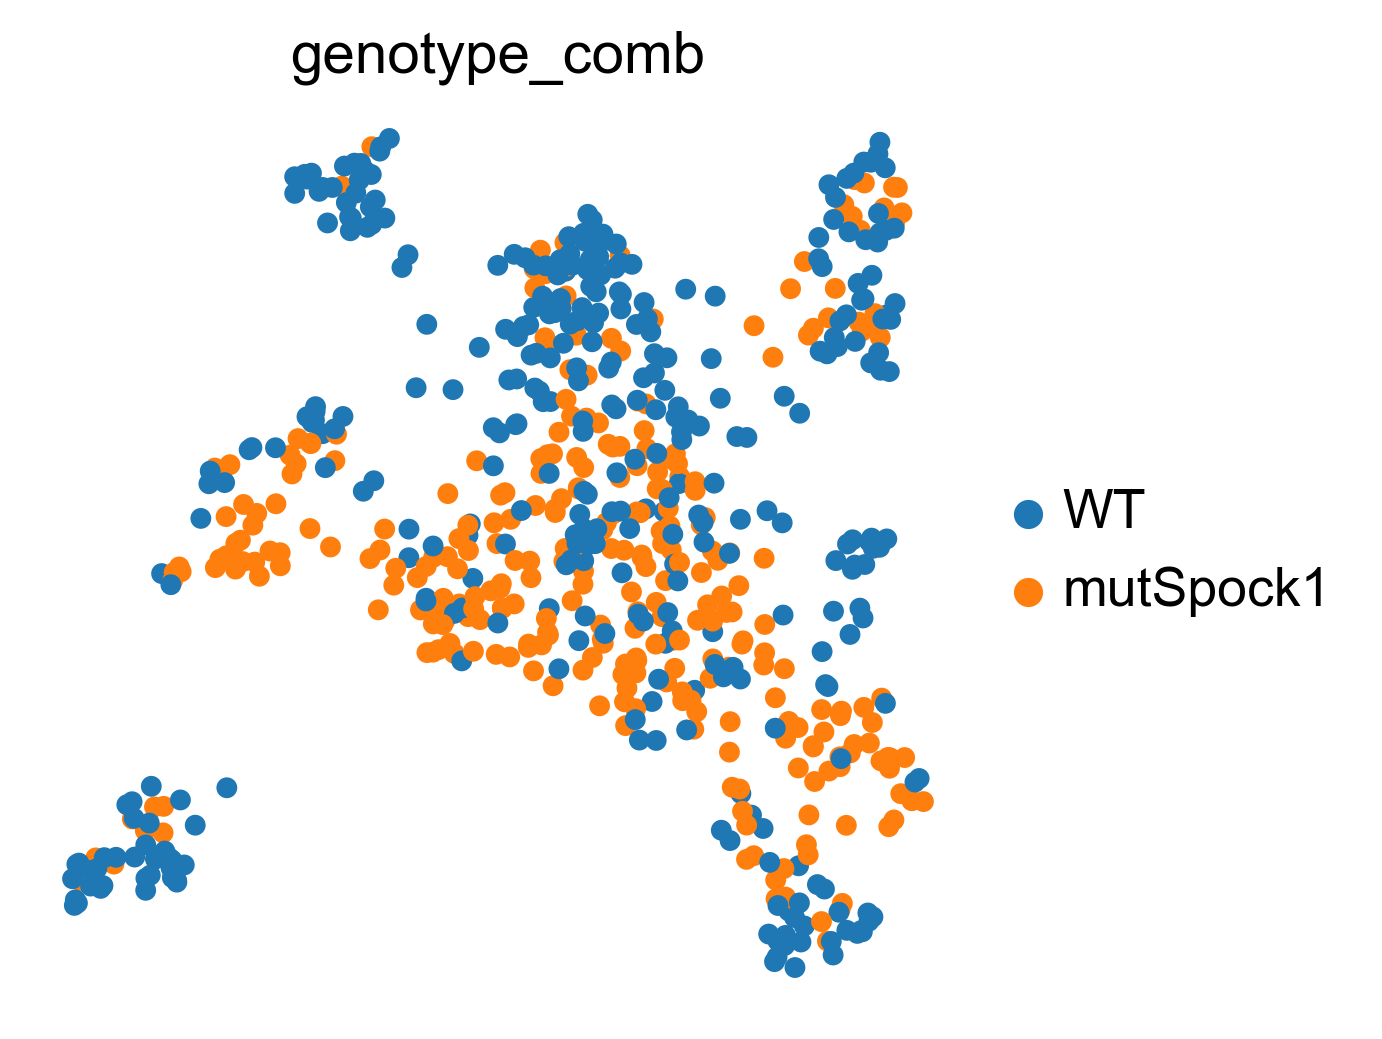

In [10]:
sc.pl.umap(adata, color='genotype_comb', size=100, frameon=False, save='_Endothelial_Subclustered_genotype2.pdf')

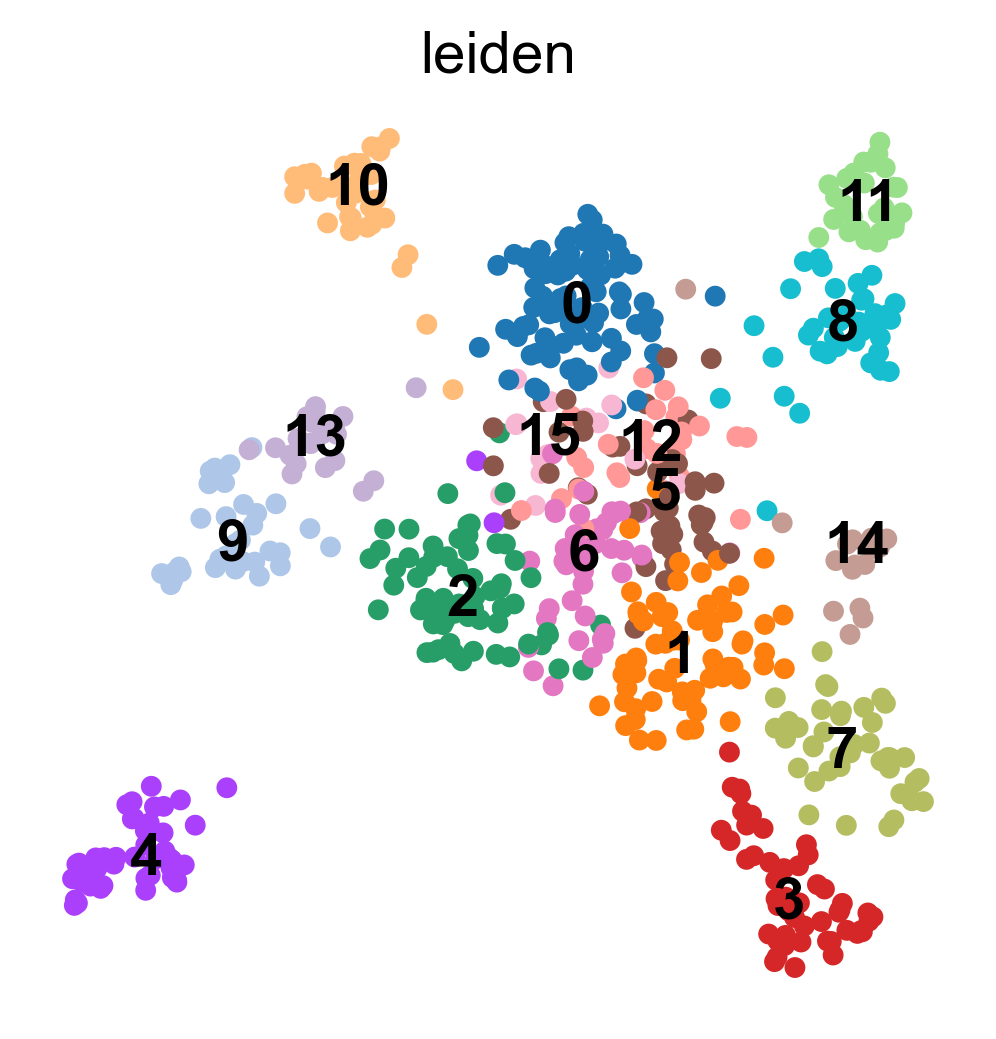

In [11]:
sc.pl.umap(adata, color='leiden', size=100, frameon=False, legend_loc='on data', save='_Endothelial_Subclustered_leiden.pdf')

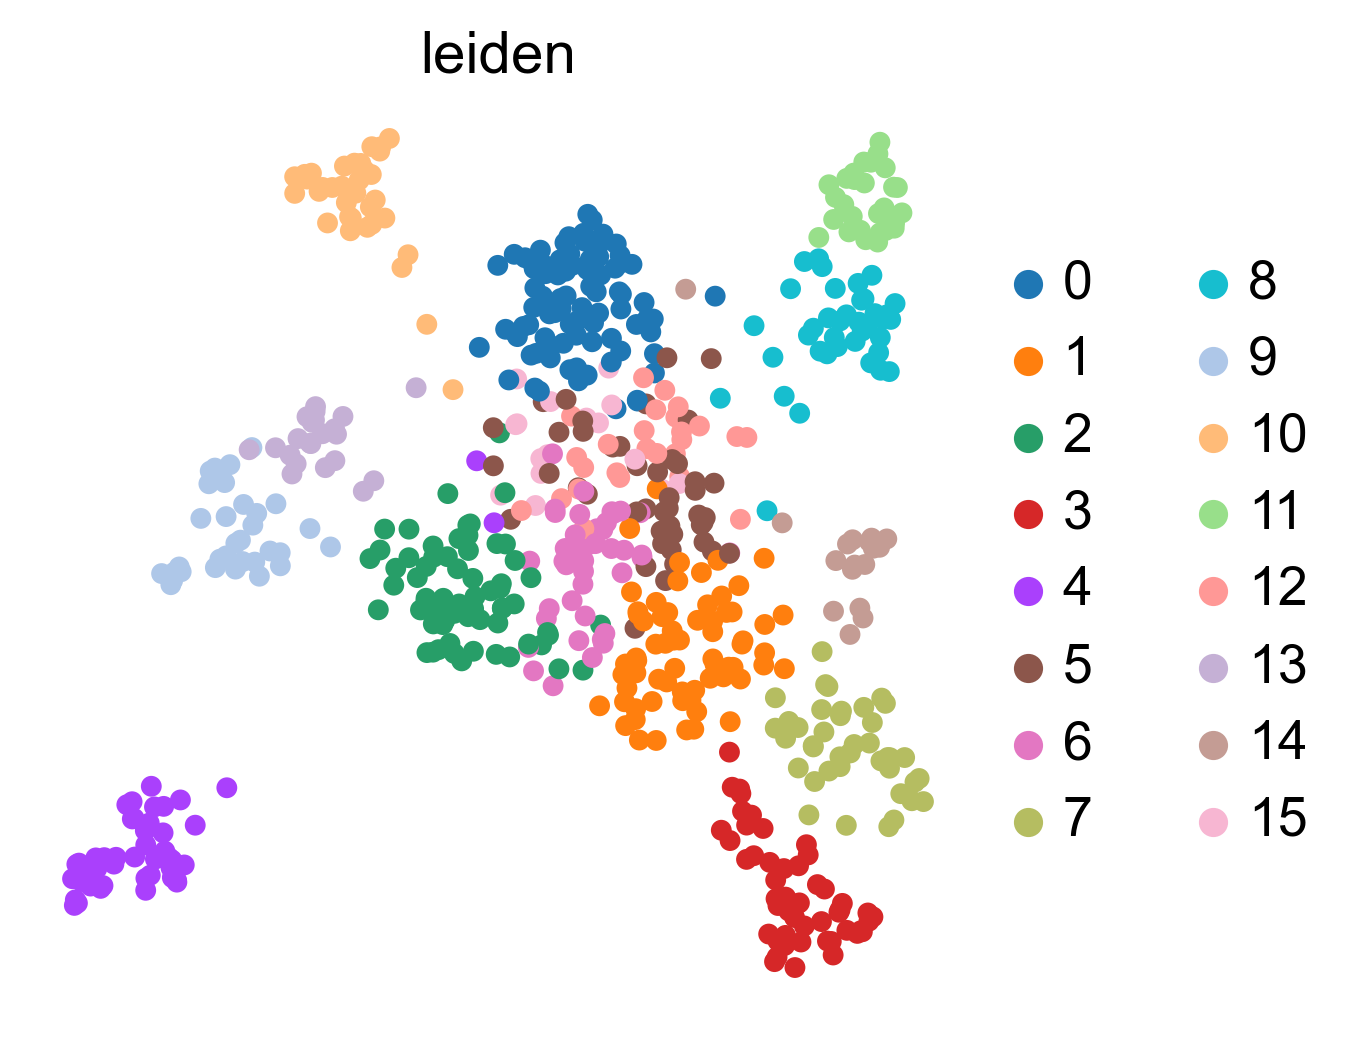

In [12]:
sc.pl.umap(adata, color='leiden', size=100, frameon=False, save='_Endothelial_Subclustered_leiden_2.pdf')

### Annotate data

In [13]:
adata.obs['annotations']='neurons'


annotations = {
    '1': 'pharyngeal arch',
    '3': 'pharyngeal arch',
    '2': 'muscle',
    '4': 'endothelial',    
    '7': 'epidermis',
    '14': 'epidermis',
    '8': 'meninges',
    '11': 'meninges',
    '9': 'vSMCs',
    '13': 'pericytes'
}


for i in annotations:
    ind = adata.obs['leiden']==i
    adata.obs['annotations'][ind] = annotations[i]

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


/Applications/anaconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'annotations' as categorical


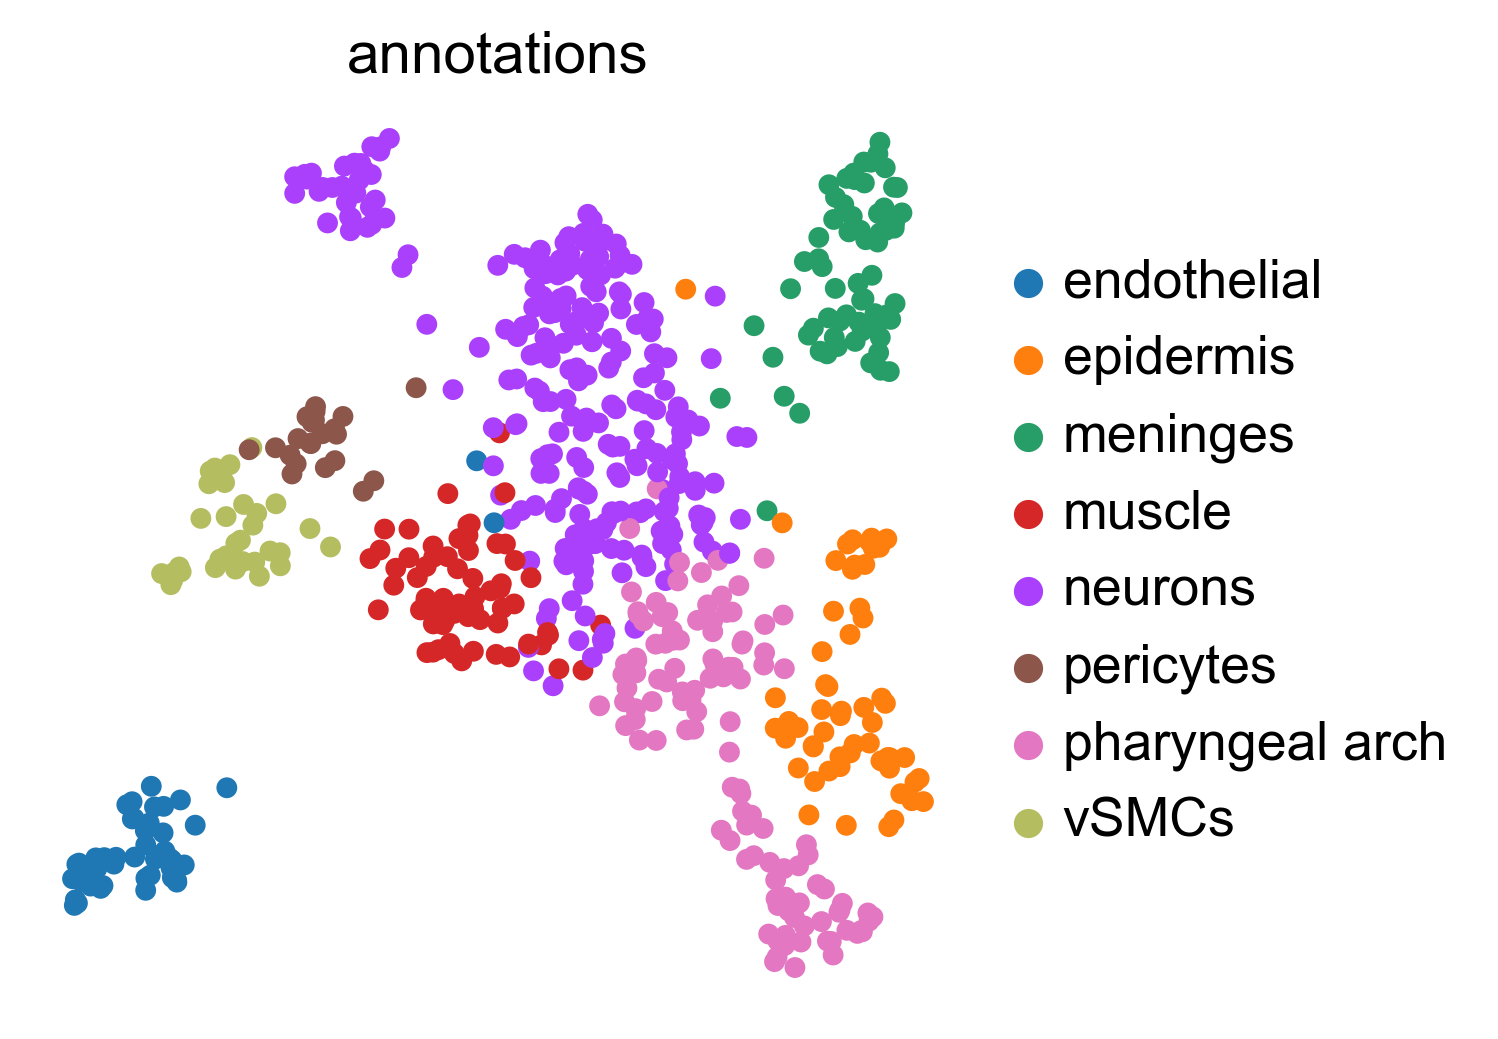

In [14]:
sc.pl.umap(adata, color='annotations', size=100, frameon=False, save='_Endothelial_Subclustered_annotation.pdf')

['#1f77b4', '#ff7f0e', '#279e68', '#d62728', '#aa40fc', '#8c564b', '#e377c2', '#b5bd61']
['endothelial' 'epidermis' 'meninges' 'muscle' 'neurons' 'pericytes'
 'pharyngeal arch' 'vSMCs']


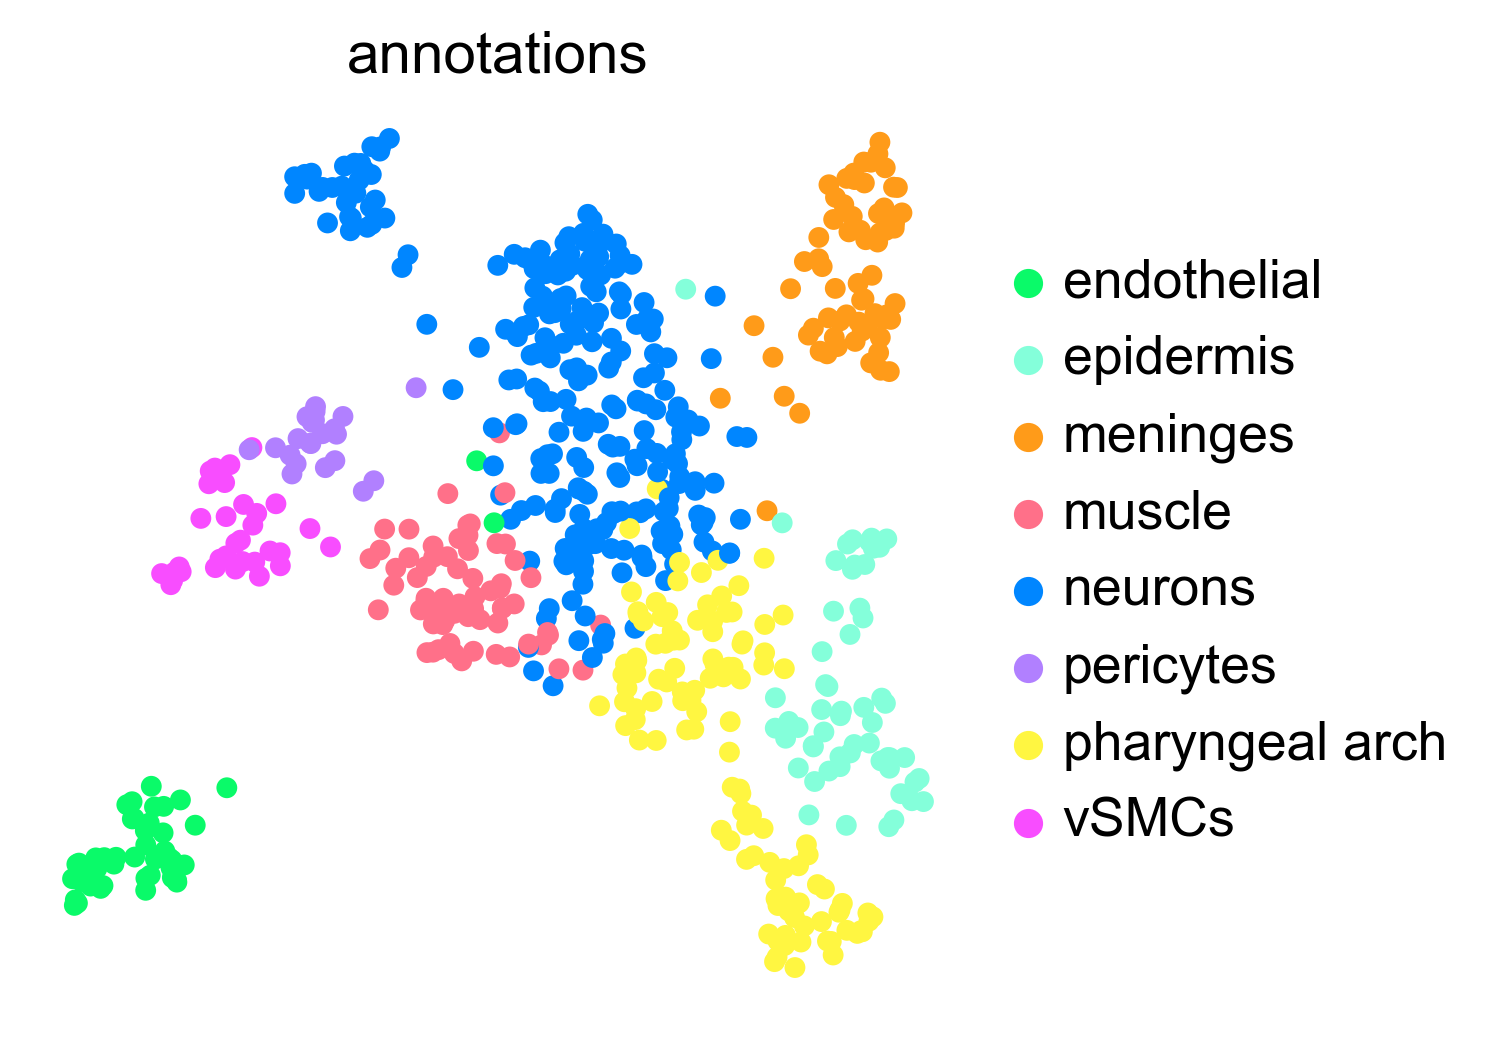

In [15]:
print(adata.uns['annotations_colors'])

# Annotation categories
print(adata.obs['annotations'].cat.categories.values)

# Change color on annotations
tmp = adata
tmp.uns['annotations_colors'] = ['#0AFA69', '#84FFDA', '#FF9B19', '#FF7089', '#0086FF', '#B180FF', 
                                 '#FFF641', '#F84DFF']

# Plot
sc.pl.umap(tmp, color='annotations', size=100, frameon=False, save='_Endothelial_Subclustered_annotation.pdf')

### Gene Expression plots for cell types of interest

In [16]:
# Assign cell type and genotype categories
# Leiden Clusters: 10 (pericytes), 15 (endothelial)
# Genotypes: WT, Mutant

# Create cell_type observation to store labels
adata.obs['cell_type']='none'

ind1 = adata.obs['genotype'].str.contains('AB|RNF') & adata.obs['leiden'].str.contains('13')
ind2 = adata.obs['genotype'].str.contains('mutSpock1') & adata.obs['leiden'].str.contains('13')
ind3 = adata.obs['genotype'].str.contains('AB|RNF') & adata.obs['leiden'].str.contains('4')
ind4 = adata.obs['genotype'].str.contains('mutSpock1') & adata.obs['leiden'].str.contains('4')

adata.obs['cell_type'][ind1] = 'Pericytes WT'
adata.obs['cell_type'][ind2] = 'Pericytes mut'
adata.obs['cell_type'][ind3] = 'Endothelial WT'
adata.obs['cell_type'][ind4] = 'Endothelial mut'


print(sum(ind1), sum(ind2), sum(ind3), sum(ind4))


# Create subcluster of cell types of interest
adata_sub = adata[adata.obs['cell_type']!='none']

14 8 56 10


/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/Applicatio

## Save Data

In [17]:
# Store Raw reads
adata.X = adata.raw.X


# Save updated data file
adata.write('210902_PATBROWN_final_subclustered_updated_vasc.h5ad')


/Applications/anaconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'cell_type' as categorical
